In [24]:
import pulp

# EXAMPLE

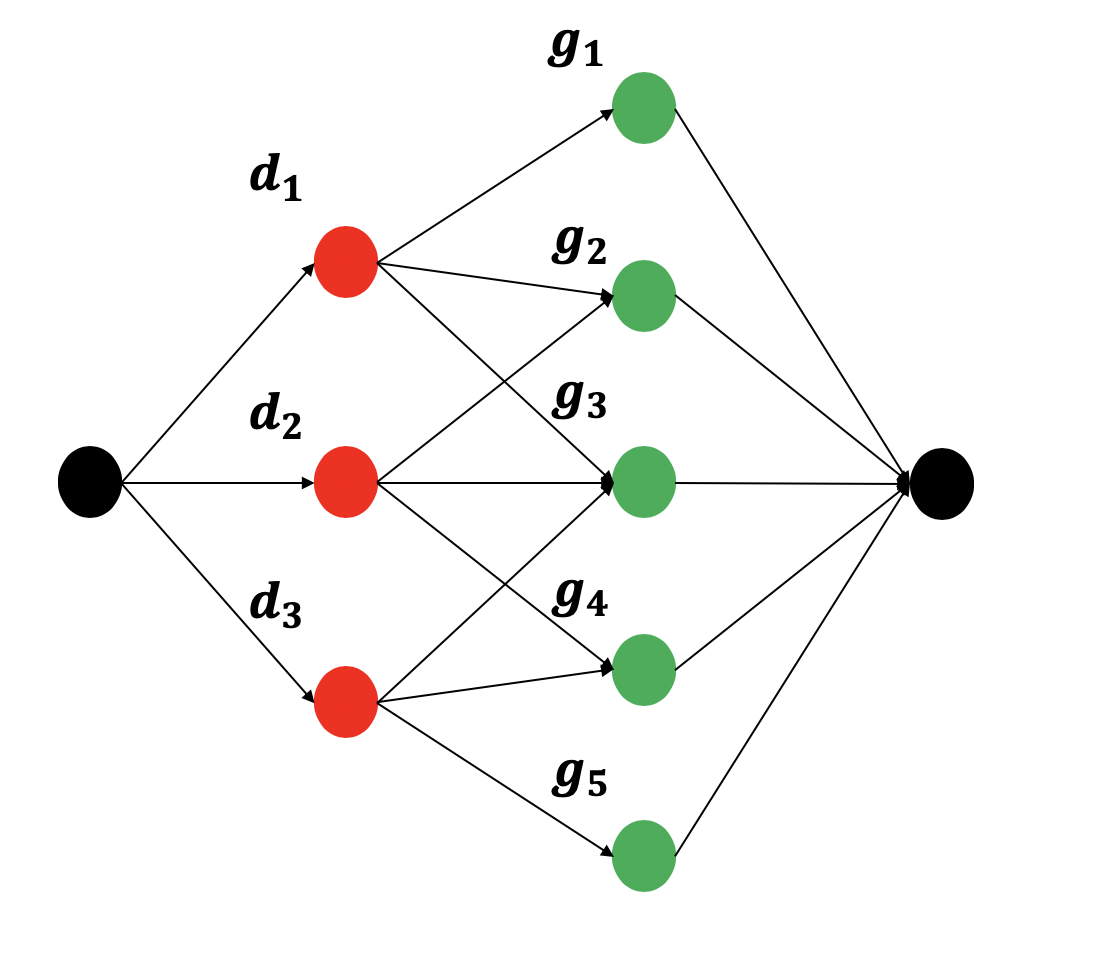


In [27]:
'''ParaM'''

Driver_list=['d1','d2','d3']
Destination_list=['g1','g2','g3','g4','g5']

Cost_={'d1':{'g1':-2,'g2':-5,'g3':-3,'g4':0,'g5':0},\
       'd2':{'g1':0,'g2':-5,'g3':-3,'g4':-8,'g5':0,},\
       'd3':{'g1':0,'g2':0,'g3':-2,'g4':-7,'g5':-5}}


Capacity_={'g1':1,'g2':1,'g3':1,'g4':1,'g5':1}



In [28]:
'''Define the problem'''

model = pulp.LpProblem("Resource constrained assignment problem", pulp.LpMinimize)

'''Construct our decision variable lists'''

Driver_list=['d1','d2','d3']

Destination_list=['g1','g2','g3','g4','g5']

X = pulp.LpVariable.dicts("X",((i, j) for i in Driver_list for j in Destination_list),lowBound=0,upBound=1,cat='Integer')

'''Objective Function'''

model += (pulp.lpSum([Cost_[i][j] * X[(i, j)] for i in Driver_list for j in Destination_list]))



'''Each drive can only be assigened one destination'''

for i in Driver_list:

    model += pulp.lpSum([X[(i, j)] for j in Destination_list]) <=1
    
'''Resource Constraints'''

for j in Destination_list:
    
     model += pulp.lpSum([X[(i, j)] for i in Driver_list]) <=Capacity_[j]
    


model.solve()

print(pulp.LpStatus[model.status])

Rep_action={}

for var in X:
    
    var_value = X[var].varValue
    if var_value !=0:
        Rep_action[var[0]]=var[1]
        
Rep_action
    



Optimal


{'d1': 'g2', 'd2': 'g4', 'd3': 'g5'}